In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow

tensorflow.__version__

'2.7.1'

In [3]:
from tensorflow.keras import models
from tensorflow.keras.models import load_model

model = load_model('VGG16_BatchNor.h5')

In [4]:
import cv2 ### pip install opencv-python

frame = cv2.imread('happy_woman.jpeg')

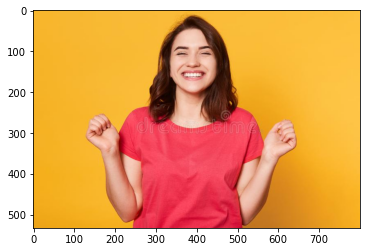

In [5]:
import matplotlib.pyplot as plt
#  matplotlib.pyplot.imshow 

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [7]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [8]:
faces = FaceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces :
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2) #BGR
    facess = FaceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else :
        for (ex,ey,ew,eh) in facess :
            face_roi = roi_color[ey: ey + eh, ex:ex + ew]

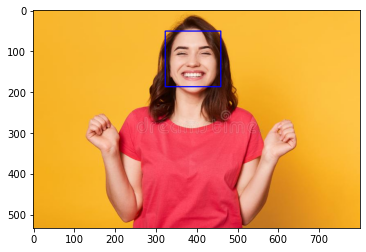

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

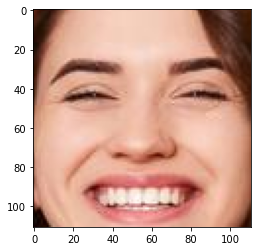

In [13]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
plt.savefig('face_roi.jpg')

In [11]:
import numpy as np

final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
# final_image = final_image/255.0


In [15]:
input_dir = 'input_dir' #inputImage가 저장될 경로로 변경해야함

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

input_datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 32
img_size = 250

input_generator = input_datagen.flow_from_directory(input_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

Found 0 images belonging to 0 classes.


### output

In [22]:
Prediction = model.predict(final_image)

ValueError: in user code:

    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 250, 250, 3), found shape=(None, 224, 224, 3)


### 5) Model Evaluate

In [ ]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))